In [4]:
import h5py
#from skbeam.core.image import gaussfill
import numpy as np
from pyCXD.detector.eiger import EigerImages
from skimage.restoration import inpaint

from matplotlib.pyplot import figure, ion, clf, imshow, clim, xlim,ylim, subplot
%matplotlib inline

In [5]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter

def gaussfill(img, mask,sigma=30,poisson=False,Navg=None):
    ''' Fill in masked regions by a Gaussian averaged version.
        img - the image
        mask - the mask
        sigma (default: 30) - the std dev for the Gaussian kernel (twice this
            should be about the longest void in mask)
        Navg - the number of images averaged to mimick for the Poissonization (if True)
    '''
    imgf = np.copy(img)*mask
    imgg = gaussian_filter(img*mask,sigma)
    imgmsk = gaussian_filter(mask*1.,sigma)
    imgmskrat = gaussian_filter(mask*0.+1,sigma)
    w = np.where((mask < .1)*(imgmsk > 0))
    newmask = np.copy(mask)
    newmask[w] = 1
    imgf[w] = imgg[w]/imgmsk[w]*imgmskrat[w]
    if poisson:
        if Navg is None:
            Navg = 1.
        imgf[w] = np.random.poisson(imgf[w]*(imgf[w]<1e9)*Navg)/Navg # some threshold since poisson doesnt work at high vals
    return imgf, newmask

In [6]:
# load some example data
npdata = np.load("data/imagefill-data.npz")

#this image was averaged over 10 frames
img = npdata['img']
mask = npdata['mask']
x0 = npdata['XCEN']
y0 = npdata['YCEN']

In [7]:
#img = np.random.random((10,10))
#mask = np.ones_like(img)
#mask[5,6] = 0
#mask[9,4] = 0

In [8]:
#img_inpaint = inpaint.inpaint_biharmonic(img,mask==0)

In [10]:
# Navg is 10 because we need to sample from a Poisson distribution assuming
# the count rate was 10 times higher and variance reduced by a factor of sqrt(10)
img_gaussfilled, newmask = gaussfill(img,mask,sigma=30,poisson=True,Navg=10)
# calculate the new mask to see what has been filled
#newmask_gaussfilled = gaussfill(np.ones(mask.shape), mask, sigma=30) > 1e-6
newmask *= newmask > 1e-6
# we can use a circular average as well

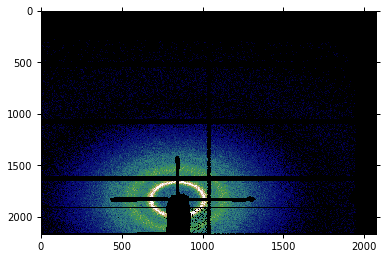

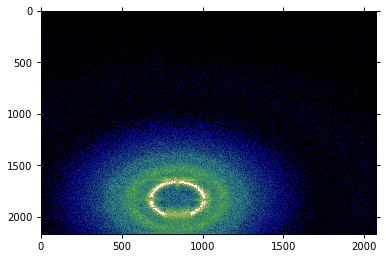

In [11]:
figure(0);clf()
imshow(mask*img);clim(0,10)
figure(1);clf()
imshow(img_gaussfilled);clim(0,10)
#xlim(1000,1500);ylim(1500,1000)#
#tried running using inpaint but code ran for 15 min and still no result in sight
#figure(2);clf();
#imshow(img_inpaint)
#clim(0,10)


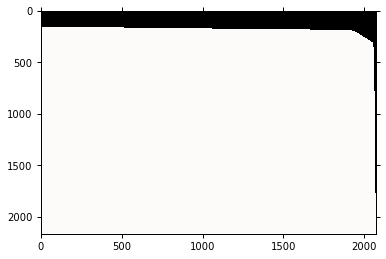

In [13]:
figure(3);clf();
imshow(newmask)